In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:

with open('spread_mkl.csv', 'r') as f:
    reader = csv.reader(f)
    n_data_mkl = list(reader)
with open('spread_oblas.csv', 'r') as f:
    reader = csv.reader(f)
    n_data_oblas = list(reader)
with open('spread_blis.csv', 'r') as f:
    reader = csv.reader(f)
    n_data_blis = list(reader)




with open('../../size_scalability/EPYC/SPREAD/blis.csv', 'r') as f:
    reader = csv.reader(f)
    data_blis = list(reader)

with open('../../size_scalability/EPYC/SPREAD/oblas.csv', 'r') as f:
    reader = csv.reader(f)
    data_oblas = list(reader)

with open('../../size_scalability/EPYC/SPREAD/mkl.csv', 'r') as f:
    reader = csv.reader(f)
    data_mkl = list(reader)


In [3]:
def PLOT (data): 
    data_array = np.array(data[1:], dtype=float)

    data_per_dimension = np.empty((19, 5, 3))
    j = 0
    for i in range(0,19):
            data_per_dimension[i]=  data_array[j:j+5,:]
            j = j + 5

    method_sd = np.empty((19, 3))
    method = np.empty((19, 3))
    for i in range(0,19):
            method[i]=  np.mean(data_per_dimension[i], axis=0)
            method_sd[i]=  np.std(data_per_dimension[i], axis=0)

    return method, method_sd
    

In [4]:

n_mkl, n_std_mkl=PLOT(n_data_mkl)
n_oblas, n_std_oblas=PLOT(n_data_oblas)
n_blis, n_std_blis=PLOT(n_data_blis)

mkl, std_mkl=PLOT(data_mkl)
oblas, std_oblas=PLOT(data_oblas)
blis, std_blis=PLOT(data_blis)





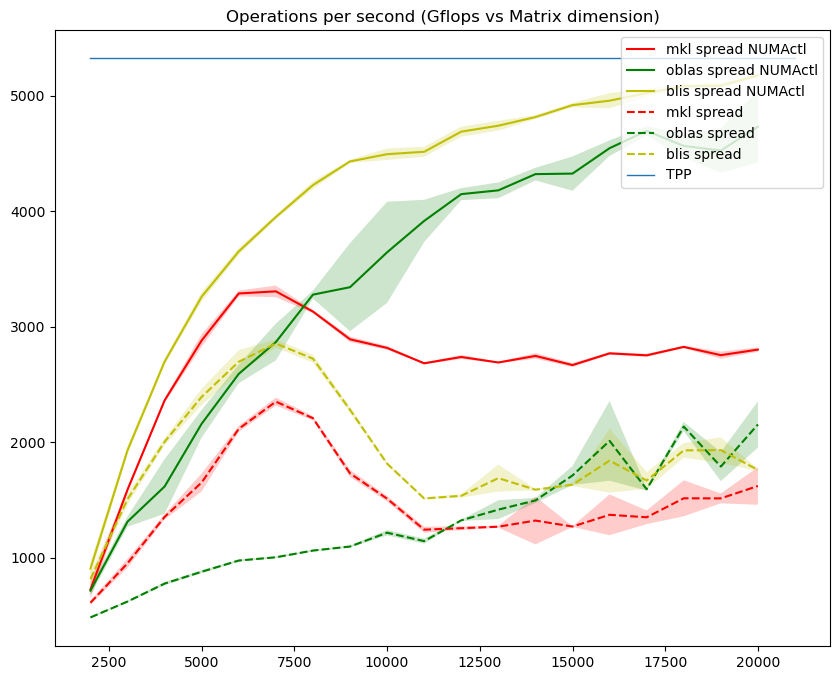

In [6]:
plt.figure(figsize=(10,8))
plt.plot(range(2000,21000,1000), n_mkl[:,2], color='r', label='mkl spread NUMActl')
#plt.scatter(range(2000,21000,1000), mkl[:,2], color='r')
plt.fill_between(range(2000,21000,1000), n_mkl[:,2]+n_std_mkl[:,2], n_mkl[:,2]-n_std_mkl[:,2], facecolor='r', alpha=0.2 )

plt.plot(range(2000,21000,1000), n_oblas[:,2], color='g', label='oblas spread NUMActl')
#plt.scatter(range(2000,21000,1000), oblas[:,2], color='g')
plt.fill_between(range(2000,21000,1000), n_oblas[:,2]+n_std_oblas[:,2], n_oblas[:,2]-n_std_oblas[:,2], facecolor='g', alpha=0.2 )

plt.plot(range(2000,21000,1000), n_blis[:,2], color='y', label='blis spread NUMActl')
#plt.scatter(range(2000,21000,1000), blis[:,2], color='y')
plt.fill_between(range(2000,21000,1000), n_blis[:,2]+n_std_blis[:,2], n_blis[:,2]-n_std_blis[:,2], facecolor='y', alpha=0.2 )


plt.plot(range(2000,21000,1000), mkl[:,2], color='r', label='mkl spread', linestyle='dashed')
#plt.scatter(range(2000,21000,1000), mkl[:,2], color='r')
plt.fill_between(range(2000,21000,1000), mkl[:,2]+std_mkl[:,2], mkl[:,2]-std_mkl[:,2], facecolor='r', alpha=0.2 )

plt.plot(range(2000,21000,1000), oblas[:,2], color='g', label='oblas spread', linestyle='dashed')
#plt.scatter(range(2000,21000,1000), oblas[:,2], color='g')
plt.fill_between(range(2000,21000,1000), oblas[:,2]+std_oblas[:,2], oblas[:,2]-std_oblas[:,2], facecolor='g', alpha=0.2 )

plt.plot(range(2000,21000,1000), blis[:,2], color='y', label='blis spread', linestyle='dashed')
#plt.scatter(range(2000,21000,1000), blis[:,2], color='y')
plt.fill_between(range(2000,21000,1000), blis[:,2]+std_blis[:,2], blis[:,2]-std_blis[:,2], facecolor='y', alpha=0.2 )

x = np.linspace(2000,21000,19)
y = 83.2*64*(x/x)
plt.plot(x, y, label='TPP', linewidth=1)

plt.title("Operations per second (Gflops vs Matrix dimension)")
plt.legend(loc='upper right')
plt.show()
